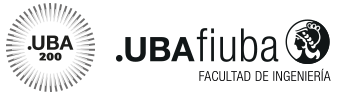

# <center> ANÁLISIS NUMÉRICO I - MODELACIÓN NUMÉRICA
    
# <center> Ecuaciones no Lineales - Tercera Parte
# <center>Métodos de refinamiento: Halley y Chebychev

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*.

# <center> CASO A ANALIZAR
___
Hallar $p$ tal que $f(p)=0,$ $p  \in [10,150]$ siendo :
$$f(x)=\frac{9,80665\cdot 12^2}{2\cdot \pi}\cdot \tanh\left(\frac{2\cdot \pi\cdot 14}{x}\right)-x.$$

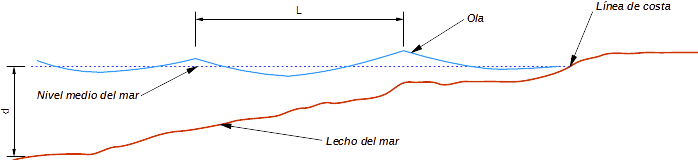


### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$



### <center> Método de Halley
___
Si se mejora el **Método de Newton-Raphson** de manera de obtener un método de convergencia cúbida, el resultado es el <b>Método de Halley</b>. La expresión es:

$$x_{j+1}=x_j-\frac{2}{2-\frac{f(x_j)\cdot f''(x_j)}{[f'(x_j)]^2}}\frac{f(x_j)}{f'(x_j)}$$



In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método Halley
def Halley(x0 , tol, itmax = 100): 
        df = pd.DataFrame(columns=('xcero','xuno'))
        x0 = x0 
        contador = 0  
        x1 = x0-(2/(2-f(x0)*f2d(x0)/(fd(x0))**2))*f(x0)/fd(x0)
        while (contador < itmax) and (abs((x1-x0)/x1) > tol):
            df.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = x0-(2/(2-f(x0)*f2d(x0)/(fd(x0))**2))*f(x0)/fd(x0)
            contador += 1
        er=abs((x1 - x0) / x1)
        print('El \033[1mMétodo de Halley \033[0mconvergió en',contador,'iteraciones. El resultado es:',np.round(x1,6),'m y el error relativo es',np.format_float_scientific(er,precision=6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),'m.')
        return df


In [2]:
#Definición del valor inicial y la Tolerancia
import sympy as sp #librería para manejo simbólico de ecuaciones

X0=10
tolerancia=10**(-8)

#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = ((9.80665*12**2)/(2*sp.pi))*sp.tanh((2*sp.pi*14/x))-x#Acá hay que escribor la función a analizar. OJO que sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica
y2d=sp.diff(y,x,x) #Calcula la segunda derivada simbólica

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)
f2d=sp.lambdify(x,y2d)

ejemplo1=Halley(X0, tolerancia)


El Método de Halley convergió en 4 iteraciones. El resultado es: 131.395838 m y el error relativo es 2.163060e-16 . El valor de la función resulta -5.684342e-14 m.


In [3]:
from IPython.display import display, Math
import sympy.printing as printing

xcero = ejemplo1.xcero
xuno = ejemplo1.xuno

print ("Analicemos todas las iteraciones. \n")  

for p in range (4):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    ec = "x_"+str(p)+"= "+str(xcero[p])+"\;y\; x_"+str(p+1)+"=x_"+str(p)+"-\\frac{2}{2-\\frac{f(x_"+str(p)+")f''(x_"+str(p)+")}{f'(x_"+str(p)+")^2}}\\frac{f(x_"+str(p)+")}{f'(x_"+str(p)+")}"+"= "+str(xuno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos todas las iteraciones. 

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

Iteración 4: 


<IPython.core.display.Math object>

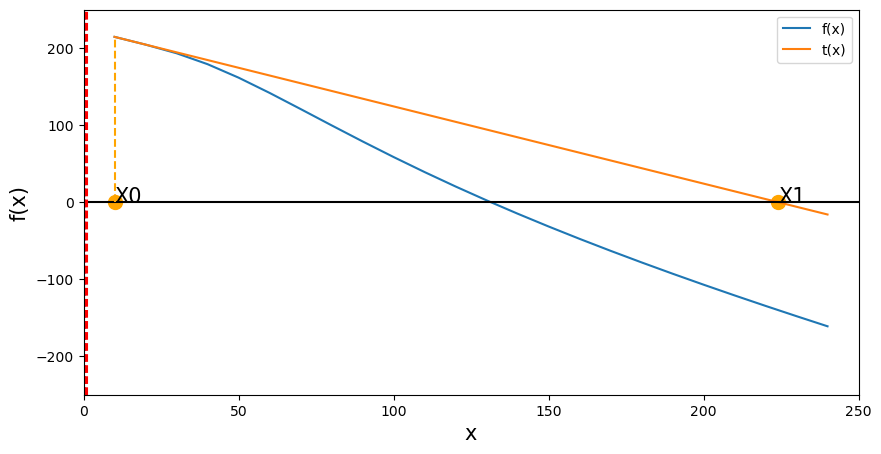

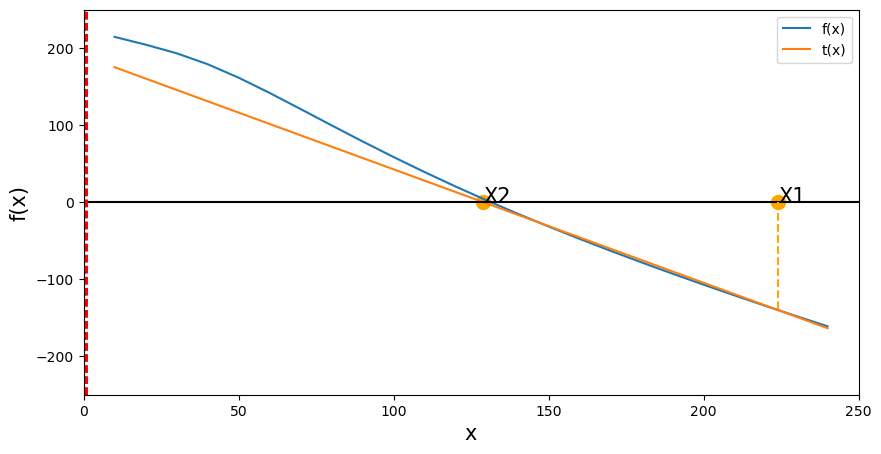

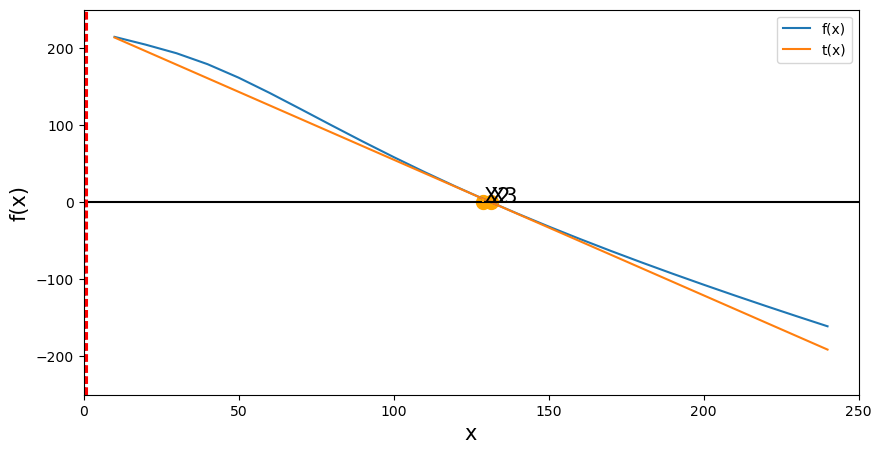

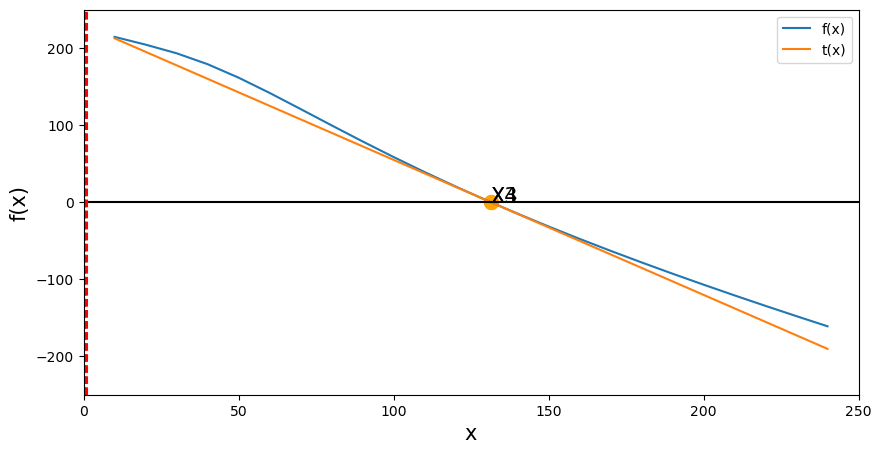

In [4]:
import matplotlib.pyplot as plt
ejex = np.arange(10, 250, 10);
y = f(ejex)
    
for p in range (4):
    def t(x):#definimos la recta tangente
        return f(xcero[p])+(2*fd(xcero[p])**2-f(xcero[p])*f2d(xcero[p]))*(x-xcero[p])/(2*fd(xcero[p]))
    fig = plt.figure(figsize=(10,5))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.xlim(0,250)
    plt.ylim(-250,250)
    plt.ylabel('f(x)',fontsize=15)
    plt.plot(ejex, t(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p), (xcero[p], 0),fontsize=15)
    plt.plot([xcero[p],xcero[p]], [0,t(xcero[p])], color='orange',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p+1), (xuno[p], 0),fontsize=15)
    plt.legend(['f(x)','t(x)'],fontsize=10)
    plt.axvline(x=0, color='m',linestyle='dashed') 
    plt.axvline(x=0.42, color='m',linestyle='dashed')
    plt.axvline(x=0.5, color='r',linestyle='dashed') 
    plt.axvline(x=1, color='r',linestyle='dashed'); 

<b>Obervación</b>: dado que el <b>Método de Halley</b> usa la función $\phi(x)=\frac{f(x)}{\sqrt{f'(x)}} $ y no $f(x)$, la recta tangente que se muestra en el primer gráfico no es tangente a $f(x)$.

In [13]:
print('Resumen de resultados del \033[1mMétodo de Halley\033[0m:')
print('A continuación se muestran todas las iteraciones:')
ejemplo1.columns= ['Xi','Xi+1']
ejemplo1.head(4)

Resumen de resultados del Método de Halley:
A continuación se muestran todas las iteraciones:


,Xi,Xi+1
0,10.000000,224.099336
1,224.099336,129.005840
2,129.005840,131.395855
3,131.395855,131.395838


Este método es también muy rápido. Su convergencia cúbica nos permite ver que la aproximación sea muy buena. El gran problema es tener que calcular la <b>segunda derivada</b> además de la primera. 

### <center> Método de Chebychev
___
Otra mejora del **Método de Newton-Raphson** es el <b>Método de Chebychev</b>. La expresión es:

$$x_{j+1}=x_j-\left(1+\frac{f(x_j)\cdot f''(x_j)}{2\cdot[f'(x_j)]^2}\right)\frac{f(x_j)}{f'(x_j)}$$

In [5]:
#Método Chebychev
def Chebychev(x0 , tol, itmax = 100): 
        df = pd.DataFrame(columns=('x1cero','x1uno'))
        x0 = x0 
        contador = 0  
        x1 = x0-(1+f(x0)*f2d(x0)/(2*(fd(x0))**2))*f(x0)/fd(x0)
        while (contador < itmax) and (abs((x1-x0)/x1) > tol):
            df.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = x0-(1+f(x0)*f2d(x0)/(2*(fd(x0))**2))*f(x0)/fd(x0)                 
            contador += 1
        er=abs((x1 - x0) / x1)
        print('El \033[1mMétodo de Chebychev \033[0mconvergió en',contador,'iteraciones. El resultado es:',np.round(x1,6),'m y el error relativo es',np.format_float_scientific(er,precision=6),'. El valor de la función resulta',np.format_float_scientific(f(x1),precision=6),'m.')
        return df

In [6]:
ejemplo2=Chebychev(10, tolerancia)

El Método de Chebychev convergió en 4 iteraciones. El resultado es: 131.395838 m y el error relativo es 2.163060e-16 . El valor de la función resulta -5.684342e-14 m.


In [7]:
x1cero = ejemplo2.x1cero
x1uno = ejemplo2.x1uno

print ("Analicemos todas las iteraciones. \n")  

for p in range (4):
    print ("\033[1mIteración \033[0m"+str(p+1)+": ")
    ec = "x_"+str(p)+"= "+str(x1cero[p])+"\;y\; x_"+str(p+1)+"=x_"+str(p)+"-\left(1+\\frac{f(x_"+str(p)+")f''(x_"+str(p)+")}{2f'(x_"+str(p)+")^2}\\right)\\frac{f(x_"+str(p)+")}{f'(x_"+str(p)+")}"+"= "+str(x1uno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos todas las iteraciones. 

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

Iteración 3: 


<IPython.core.display.Math object>

Iteración 4: 


<IPython.core.display.Math object>

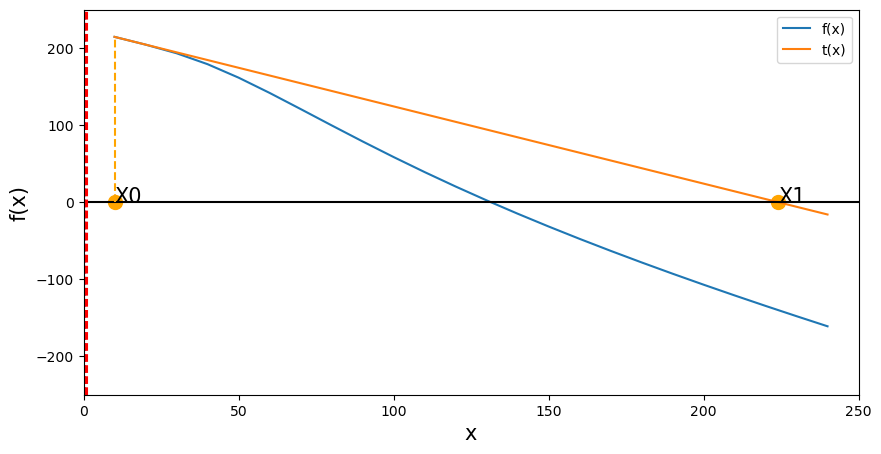

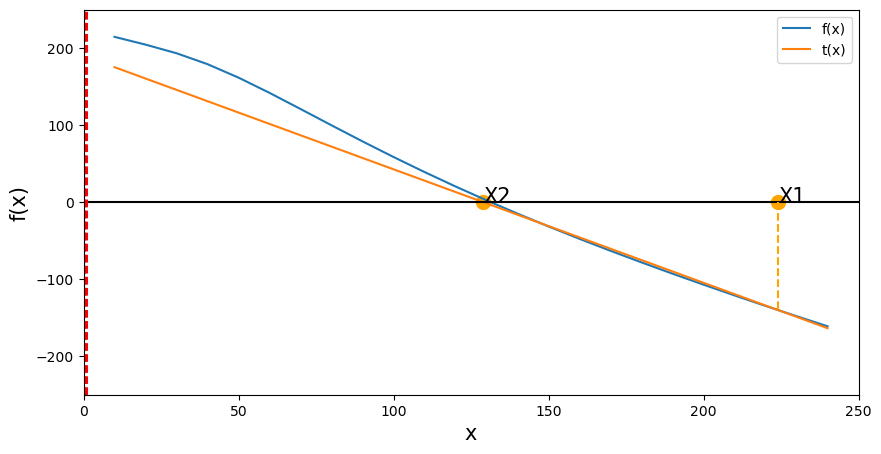

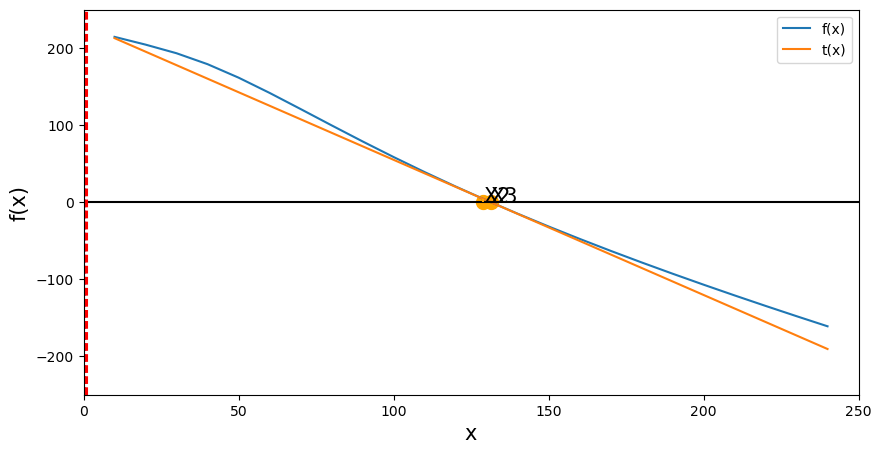

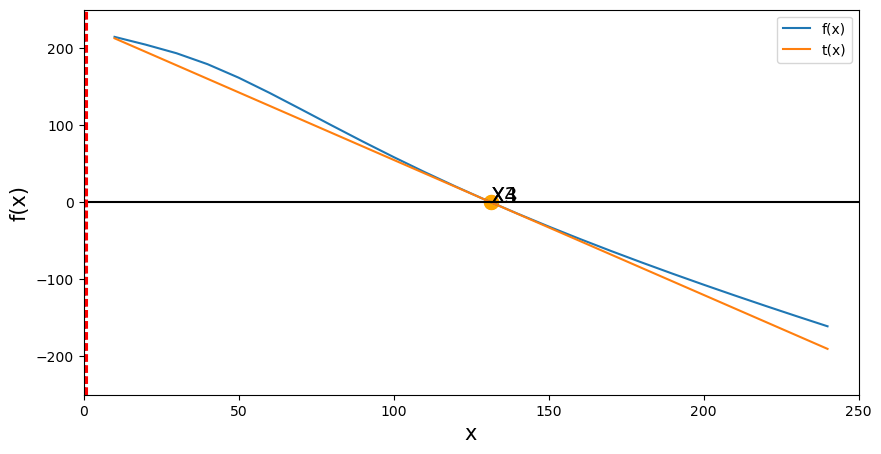

In [8]:
import matplotlib.pyplot as plt
ejex = np.arange(10, 250, 10);
y = f(ejex)
    
for p in range (4):
    def t(x):#definimos la recta tangente
        return f(x1cero[p])+(2*fd(x1cero[p])**2-f(xcero[p])*f2d(x1cero[p]))*(x-x1cero[p])/(2*fd(x1cero[p]))
    fig = plt.figure(figsize=(10,5))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.xlim(0,250)
    plt.ylim(-250,250)
    plt.ylabel('f(x)',fontsize=15)
    plt.plot(ejex, t(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p), (xcero[p], 0),fontsize=15)
    plt.plot([xcero[p],xcero[p]], [0,t(xcero[p])], color='orange',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='orange', s=100)
    plt.annotate("X"+str(p+1), (xuno[p], 0),fontsize=15)
    plt.legend(['f(x)','t(x)'],fontsize=10)
    plt.axvline(x=0, color='m',linestyle='dashed') 
    plt.axvline(x=0.42, color='m',linestyle='dashed')
    plt.axvline(x=0.5, color='r',linestyle='dashed') 
    plt.axvline(x=1, color='r',linestyle='dashed'); 

<b>Obervación</b>: dado que el <b>Método de Chebychev</b> usa una función del tipo $\phi(x)=\frac{f(x)}{\sqrt{f'(x)}} $ y no $f(x)$, la recta tangente que se muestra en el primer gráfico no es estrictamente tangente a $f(x)$.

In [9]:
print('Resumen de resultados del \033[1mMétodo de Chebychev\033[0m:')
print('A continuación se muestran todas primeras iteraciones:')
ejemplo2.columns= ['Xi','Xi+1']
ejemplo2.head(4)

Resumen de resultados del Método de Chebychev:
A continuación se muestran todas primeras iteraciones:


,Xi,Xi+1
0,10.000000,224.097370
1,224.097370,129.973474
2,129.973474,131.395830
3,131.395830,131.395838


En este caso, el <b>Método de Chebychev</b> es tan rápido como el <b>Método de Halley</b>. No siempre es así, aún cuando siempre es muy buena mejora del <b>Método de las Aproximaciones Sucesivas</b>.

Tiene el mismo incoveniente que el <b>Método de Halley</b>: requiera calcular la derivada segunda de la función.

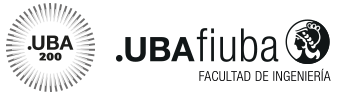



# <center> GRACIAS POR SU ATENCIÓN

## <center> ¿PREGUNTAS?

### <center> Ecuaciones no Lineales - Tercera Parte

***

**Curso Schwarz - Sosa - Castaño**
- 75.12/95.04 Análisis Numérico I. *Curso 4*.
- CB051 Modelación Numérica. *Curso 4*.